# Regression Task

This notebook demonstrates a regression task using machine learning. This is a simple demonstration of regression neural network in PyTorch using a single hidden layer, one output layer and one hidden layer. The polynomials to be learnt are:

1) 2x^2 + 4x + 2
2) 4x^2 + 4x + 10 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.hidden = nn.Linear(1, 10)  # One hidden layer with 10 neurons
        self.relu = nn.ReLU()
        self.output = nn.Linear(10, 1)  # Output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x


In [3]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, x, y):   
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [4]:
def custom_loss(model, criterion, outputs, y_data, old_params, param_importance, lambda_reg):
    normal_loss = criterion(outputs, y_data)
    reg_loss = 0.0
    for name, param in model.named_parameters():
        if param.requires_grad:
            reg_loss += torch.sum(param_importance[name] * (param - old_params[name]) ** 2)
    
    total_loss = normal_loss + lambda_reg * reg_loss
    return total_loss


In [5]:
np.random.seed(42)
x = np.random.uniform(-10, 10, 1000)
y = 2 * x**2 + 4 * x + 2
parameter_importance = {}
new_weights = {}
old_weights = {}

# Convert data to PyTorch tensors
x_train_1 = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # Shape: (5000, 1)
y_train_1 = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Shape: (500, 1)

dataset = CustomDataset(x_train_1, y_train_1)

dataloader_1 =DataLoader(dataset, batch_size=32, shuffle=True)  


In [6]:
def train_model(model,x_train,y_train,num_epochs,optimizer,device):
    losses = []
    global new_weights
    global old_weights
    old_weights = new_weights
    criterion = nn.MSELoss()
    for epoch in range(num_epochs):
    # Forward pass
        outputs = model(x_train.to(device))
        loss = criterion(outputs, y_train.to(device))

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        # if (epoch + 1) % 50 == 0:
        #     print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")
        #     print()
    
    new_weights = {name: param.clone().detach() for name, param in model.named_parameters()}
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()


In [7]:
def train_model_with_custom_loss(model,x_train,y_train,num_epochs,optimizer,device):
    losses = []
    global new_weights
    global old_weights
    old_weights = new_weights
    for epoch in range(num_epochs):
    # Forward pass
        outputs = model(x_train.to(device))
        loss = custom_loss(model,nn.MSELoss(),outputs,y_train.to(device),old_weights,parameter_importance,0.1)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        # if (epoch + 1) % 50 == 0:
        #     print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")
        #     print()
    
    new_weights = {name: param.clone().detach() for name, param in model.named_parameters()}
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()

cpu


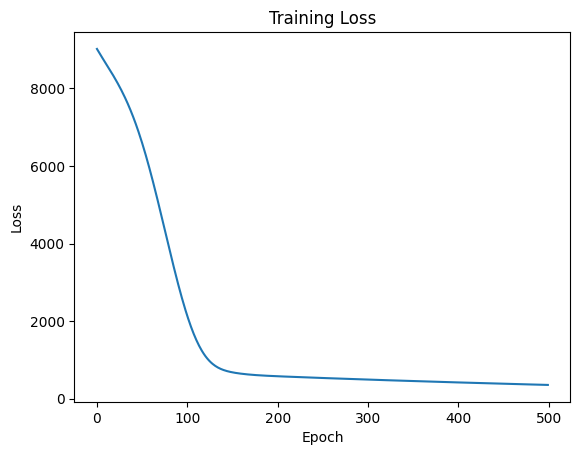

In [8]:
model_1 = RegressionModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_1.to(device)
print(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.01)

# Train the model_1
num_epochs = 500
train_model(model_1,x_train_1,y_train_1,num_epochs,optimizer,device)

# Save the trained model
torch.save(model_1.state_dict(), "model_1.pth")

cpu


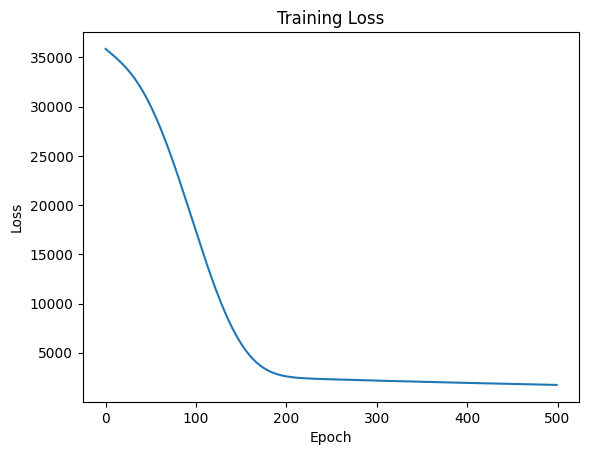

In [9]:
np.random.seed(42)
x = np.random.uniform(-10, 10, 1000)
y = 4 * x**2 + 4 * x + 10

# Convert data to PyTorch tensors
x_train_2 = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # Shape: (5000, 1)
y_train_2 = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Shape: (500, 1)

dataset = CustomDataset(x_train_2, y_train_2)

dataloader_2 =DataLoader(dataset, batch_size=32, shuffle=True)

model_2 = RegressionModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_2.to(device)
print(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.01)

# Train the model_2
num_epochs = 500
train_model(model_2,x_train_2,y_train_2,num_epochs,optimizer,device)
torch.save(model_2.state_dict(), "model_2.pth")


cpu


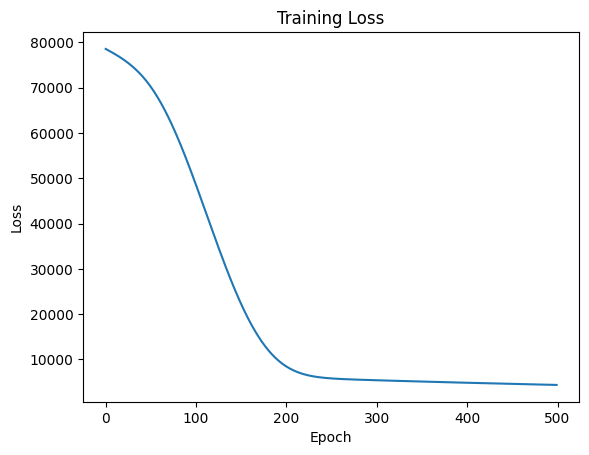

In [10]:
np.random.seed(42)
x = np.random.uniform(-10, 10, 1000)
y = 6 * x**2 + 7 * x + 9

# Convert data to PyTorch tensors
x_train_3 = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # Shape: (5000, 1)
y_train_3 = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Shape: (500, 1)

dataset = CustomDataset(x_train_3, y_train_3)
dataloader_3 =DataLoader(dataset, batch_size=32, shuffle=True)

model_3 = RegressionModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model_3.to(device)
print(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_3.parameters(), lr=0.01)

# Train the model_3
num_epochs = 500
train_model(model_3,x_train_3,y_train_3,num_epochs,optimizer,device)
torch.save(model_3.state_dict(), "model_3.pth")

cpu


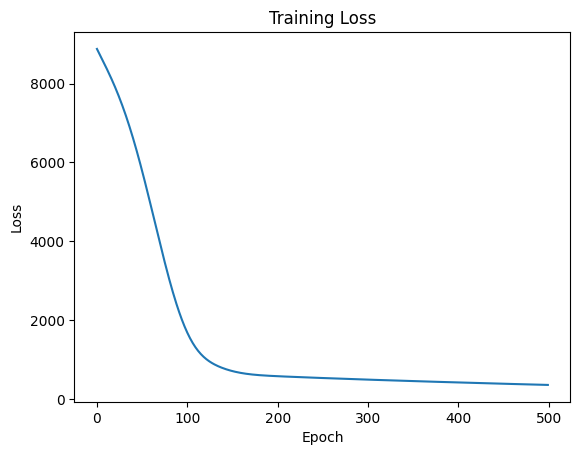

In [11]:
model_4 = RegressionModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model_4.to(device)
print(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_4.parameters(), lr=0.01)

# Train the model_2
num_epochs = 500
train_model(model_4,x_train_1,y_train_1,num_epochs,optimizer,device)

In [12]:
def calculate_importance_weights(model, x_data, y_data, parameter_importance):
    x_data = x_data.to(device)
    y_data = y_data.to(device)
    model.to(device)

    outputs = model(x_data)
    loss = criterion(outputs, y_data)

    optimizer.zero_grad()

    loss.backward()
    for name, param in model.named_parameters():
        if param.grad is not None:
            if name in parameter_importance:
                parameter_importance[name] += abs(param.grad.clone().detach())
            else:
                parameter_importance[name] = abs(param.grad.clone().detach())
    
    return parameter_importance


In [13]:
def update_param_importance(dataloader):
    for batch in dataloader:
        x_data, y_data = batch
        global parameter_importance
        parameter_importance = calculate_importance_weights(model_4, x_data, y_data, parameter_importance)

    for keys,values in parameter_importance.items():
        values = values/len(dataloader)

    print(parameter_importance)

In [14]:
update_param_importance(dataloader_1)

{'hidden.weight': tensor([[1178.0350],
        [1161.3394],
        [ 851.9449],
        [1672.6179],
        [ 862.2822],
        [1033.8998],
        [1101.7969],
        [1905.2955],
        [ 954.3555],
        [ 648.2214]]), 'hidden.bias': tensor([298.6568, 293.8193, 210.0900, 416.7305, 218.4273, 257.5130, 274.1108,
        474.8721, 240.0290, 163.8344]), 'output.weight': tensor([[1216.1422, 1035.9105,  951.3202, 2641.3728, 1491.9774, 1110.7726,
         1316.9634, 2658.5125, 1481.0674, 1103.4017]]), 'output.bias': tensor([368.3456])}


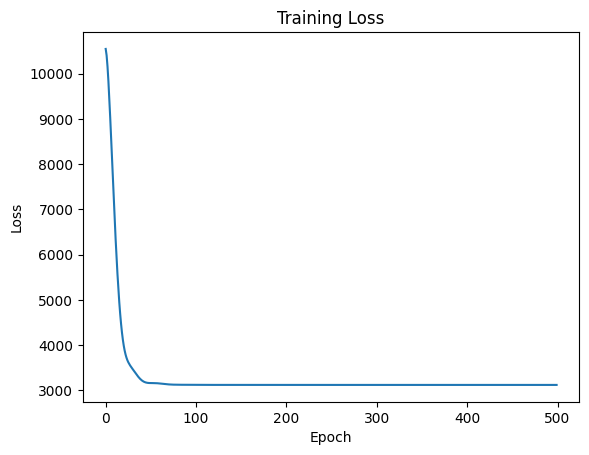

{'hidden.weight': tensor([[ 5301.9443],
        [ 5267.0396],
        [ 4321.3174],
        [14099.9336],
        [ 4112.6641],
        [ 4762.2729],
        [ 4967.7598],
        [15378.1592],
        [ 4430.4067],
        [ 3402.9675]]), 'hidden.bias': tensor([ 771.4283,  761.4377,  612.6148, 1314.5404,  590.0544,  678.6658,
         709.2919, 1446.4083,  634.2346,  479.4602]), 'output.weight': tensor([[ 5627.6743,  4906.8799,  4917.1270, 20350.0703,  6754.1475,  5135.4868,
          5874.4136, 20223.4453,  6606.2158,  5332.6646]]), 'output.bias': tensor([741.5232])}


In [15]:
train_model_with_custom_loss(model_4,x_train_2,y_train_2,num_epochs,optimizer,device)

update_param_importance(dataloader_2)

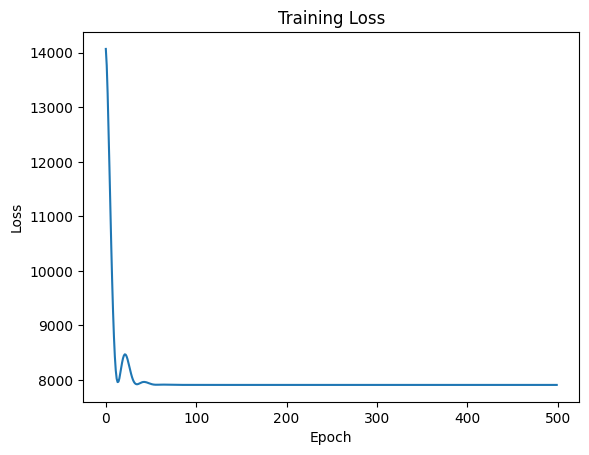

In [16]:
train_model_with_custom_loss(model_4,x_train_3,y_train_3,num_epochs,optimizer,device)

In [17]:
model_4.eval()

# Initialize x_test and y_test
x_test = torch.tensor([])
y_test = torch.tensor([])

# Randomly sample 200 samples
indices = torch.randperm(x_train_1.size(0))[:200]

x_sample = x_train_1[indices]
y_sample = y_train_1[indices]

# Append to x_test and y_test
x_test = torch.cat((x_test, x_sample))
y_test = torch.cat((y_test, y_sample))

indices = torch.randperm(x_train_2.size(0))[:200]

x_sample = x_train_2[indices]
y_sample = y_train_2[indices]  

x_test = torch.cat((x_test, x_sample))
y_test = torch.cat((y_test, y_sample))

indices = torch.randperm(x_train_3.size(0))[:200]

x_sample = x_train_3[indices]
y_sample = y_train_3[indices]  

x_test = torch.cat((x_test, x_sample))
y_test = torch.cat((y_test, y_sample))

x_test = x_test.to(device)
y_test = y_test.to(device)
model_4.to(device)

outputs = model_4(x_test)

y_pred = outputs.detach().numpy()

y_avg = 4 * x_test.numpy()**2 + 4 * x_test.numpy() + 7

outputs_1 = model_1(x_test)
outputs_2 = model_2(x_test)
outputs_3 = model_3(x_test)

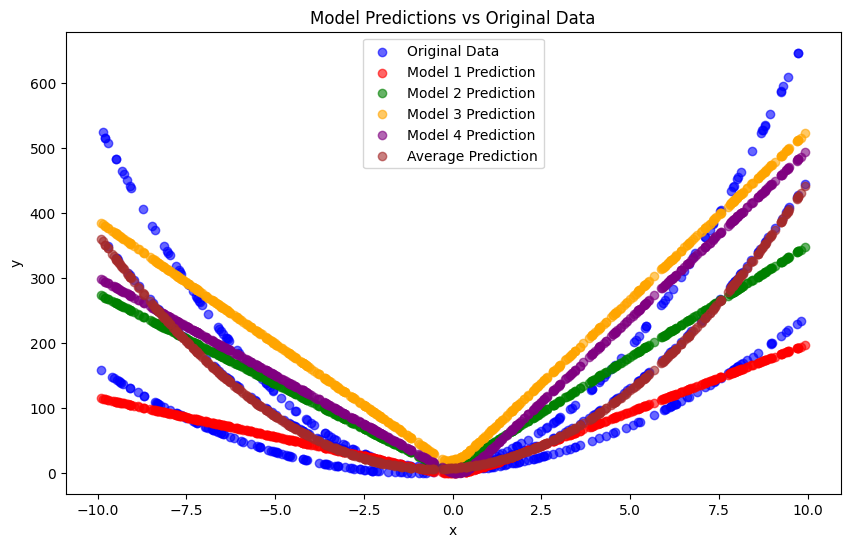

Model 1 MSE: 13558.4121
Model 2 MSE: 6931.0083
Model 3 MSE: 15134.8916
Model 4 MSE: 9471.2021


In [18]:
# plt.figure(figsize=(10, 6))
# plt.scatter(x_test.cpu().numpy(), y_test.cpu().numpy(), label="Original Data", color="blue", alpha=0.6)

# Model predictions
y_pred_1 = outputs_1.detach().cpu().numpy()
y_pred_2 = outputs_2.detach().cpu().numpy()
y_pred_3 = outputs_3.detach().cpu().numpy()
y_pred_4 = outputs.detach().cpu().numpy()

# import matplotlib.pyplot as plt
# import numpy as np

plt.figure(figsize=(10, 6))

# Scatter plot for original data
plt.scatter(x_test.cpu().numpy(), y_test.cpu().numpy(), label="Original Data", color="blue", alpha=0.6)

# Model predictions - Use scatter instead of plot
plt.scatter(x_test.cpu().numpy(), y_pred_1, label="Model 1 Prediction", color="red", alpha=0.6)
plt.scatter(x_test.cpu().numpy(), y_pred_2, label="Model 2 Prediction", color="green", alpha=0.6)
plt.scatter(x_test.cpu().numpy(), y_pred_3, label="Model 3 Prediction", color="orange", alpha=0.6)
plt.scatter(x_test.cpu().numpy(), y_pred_4, label="Model 4 Prediction", color="purple", alpha=0.6)
plt.scatter(x_test.cpu().numpy(), y_avg, label="Average Prediction", color="brown", alpha=0.6)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Model Predictions vs Original Data")
plt.show()


# Calculating Mean Squared Error for each model
mse_1 = np.mean((y_pred_1 - y_test.cpu().numpy())**2)
mse_2 = np.mean((y_pred_2 - y_test.cpu().numpy())**2)
mse_3 = np.mean((y_pred_3 - y_test.cpu().numpy())**2)
mse_4 = np.mean((y_pred_4 - y_test.cpu().numpy())**2)

print(f"Model 1 MSE: {mse_1:.4f}")
print(f"Model 2 MSE: {mse_2:.4f}")
print(f"Model 3 MSE: {mse_3:.4f}")
print(f"Model 4 MSE: {mse_4:.4f}")

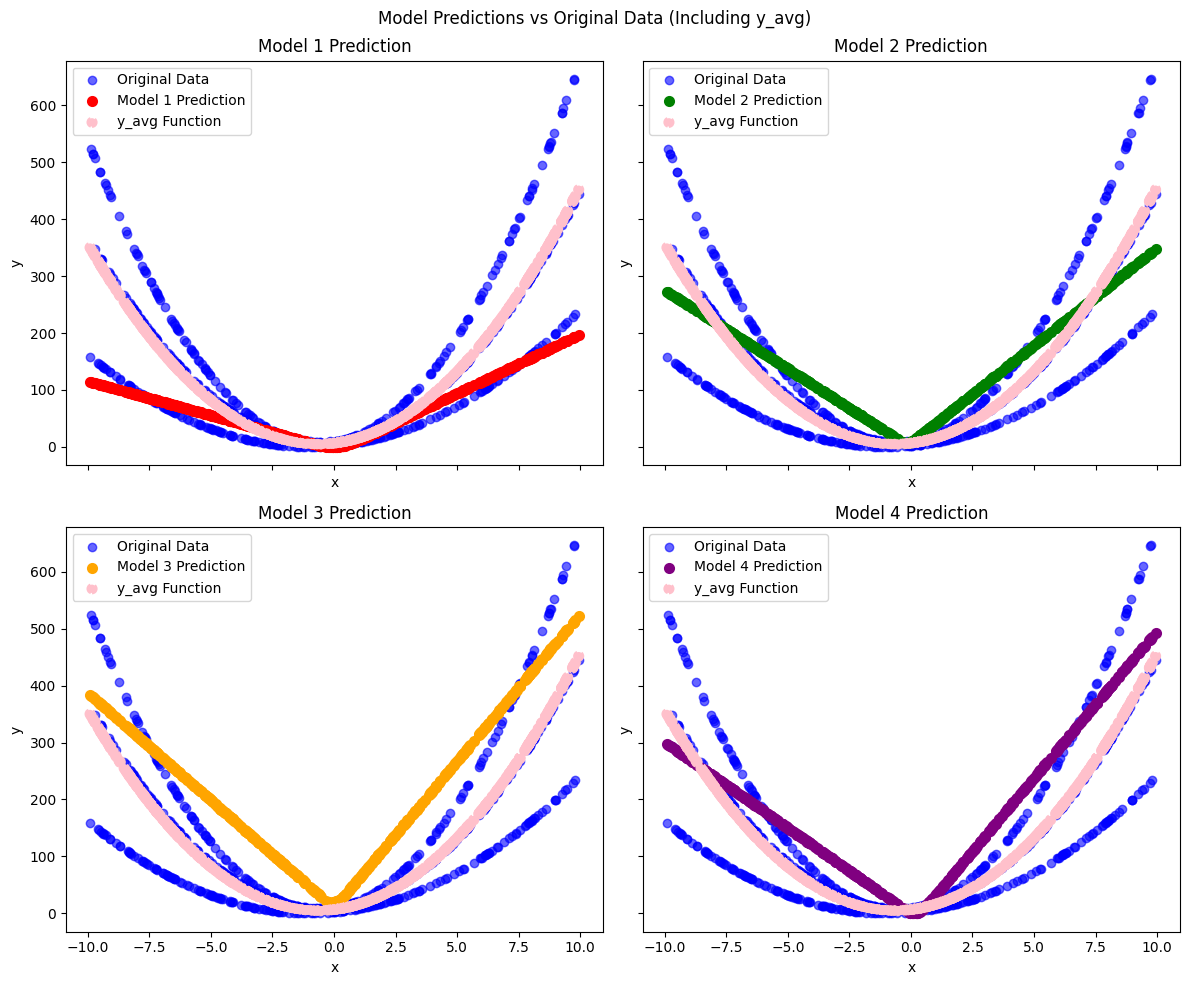

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()

models = [
    (y_pred_1, "Model 1 Prediction", "red"),
    (y_pred_2, "Model 2 Prediction", "green"),
    (y_pred_3, "Model 3 Prediction", "orange"),
    (y_pred_4, "Model 4 Prediction", "purple"),
]

x_vals = x_test.cpu().numpy()
y_vals = y_test.cpu().numpy()
y_avg = 4 * x_vals**2 + 5 * x_vals + 7  # Defined function

for i, (y_pred, title, color) in enumerate(models):
    axes[i].scatter(x_vals, y_vals, label="Original Data", color="blue", alpha=0.6)
    axes[i].scatter(x_vals, y_pred, label=title, color=color, linewidth=2)
    axes[i].scatter(x_vals, y_avg, label="y_avg Function", color="pink", linestyle="dashed", linewidth=2)  # Added y_avg
    axes[i].set_title(title)
    axes[i].legend()
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")

plt.suptitle("Model Predictions vs Original Data (Including y_avg)")
plt.tight_layout()
plt.show()

In [20]:
print(old_weights)
print(new_weights)

{'hidden.weight': tensor([[ 2.4007],
        [ 2.1015],
        [ 2.2002],
        [-4.0977],
        [ 2.8619],
        [ 2.1720],
        [ 2.4566],
        [-4.0686],
        [ 2.7762],
        [ 2.2928]]), 'hidden.bias': tensor([-1.2506, -0.9611, -2.5902, -0.4027, -1.4451, -0.6746, -0.6928, -0.4806,
        -1.1115, -0.9651]), 'output.weight': tensor([[2.1986, 2.1875, 1.8501, 2.8611, 1.7332, 1.9836, 2.0565, 3.1019, 1.8506,
         1.4672]]), 'output.bias': tensor([0.0400])}
{'hidden.weight': tensor([[ 2.7868],
        [ 2.4902],
        [ 2.6139],
        [-4.4924],
        [ 3.2683],
        [ 2.5673],
        [ 2.8452],
        [-4.4572],
        [ 3.1743],
        [ 2.7275]]), 'hidden.bias': tensor([-1.1576, -0.8648, -2.4882, -0.0521, -1.3458, -0.5731, -0.5928, -0.1384,
        -1.0115, -0.8542]), 'output.weight': tensor([[2.5850, 2.5844, 2.2571, 3.2399, 2.1108, 2.3764, 2.4373, 3.4795, 2.2268,
         1.8678]]), 'output.bias': tensor([0.2725])}
